In [1]:
import pandas as pd
import numpy as np
import scipy.stats as S
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("data.csv")

In [3]:
data=raw_data.iloc[:,1:4]

In [4]:
data.head()

,diagnosis,radius_mean,texture_mean
0,M,17.99,10.38
1,M,20.57,17.77
2,M,19.69,21.25
3,M,11.42,20.38
4,M,20.29,14.34


In [5]:
mdata=data[data["diagnosis"] == 'M']
mdatatrain=mdata.iloc[0:200,:]

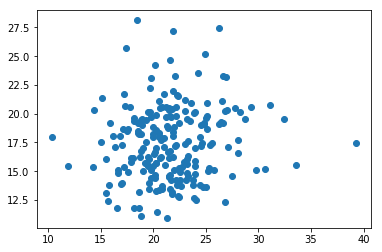

In [6]:
plt.scatter(mdata["texture_mean"],mdata["radius_mean"])

In [7]:
mdatatrain.iloc[:,1:3].head()

,radius_mean,texture_mean
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [8]:
sigmacapm=mdatatrain.cov()
sigmacapm

,radius_mean,texture_mean
radius_mean,10.175919,1.253142
texture_mean,1.253142,13.890546


In [9]:
sigmacapm = np.array(sigmacapm)
sigmacapm

array([[10.17591857,  1.25314218],
       [ 1.25314218, 13.89054569]])

In [10]:
mucapm = mdatatrain.mean()
mucapm=np.array(mucapm)

In [11]:
mucapm.reshape(2,1)

array([[17.34485],
       [21.4498 ]])

In [12]:
mucapm.shape

(2,)

In [13]:
bdata=data[data["diagnosis"] == 'B']
bdatatrain=bdata.iloc[0:200,1:3]
bdatatrain.head()

,radius_mean,texture_mean
19,13.540,14.36
20,13.080,15.71
21,9.504,12.44
37,13.030,18.42
46,8.196,16.84


In [14]:
sigmacapb = bdatatrain.cov()
sigmacapb = np.array(sigmacapb)
sigmacapb

array([[ 2.9276847 ,  0.15383955],
       [ 0.15383955, 11.27652514]])

In [15]:
mucapb = bdatatrain.mean()
mucapb = np.array(mucapb)
mucapb.reshape(2,1)

array([[11.987175],
       [17.1157  ]])

In [16]:
btest = bdata.iloc[200:,:]
mtest = mdata.iloc[200:,:]

In [17]:
pcapb = 0.5
pcapm = 0.5

In [18]:
def Multivariatenaivebayesclassifier(oneexample):
    
    # going to calculate :
    # p(stest/ tumorisbenign) =normal distribution pdf with mean = mucapb and std=sigmacapb
    pstesttumorisbenign = S.multivariate_normal.pdf(oneexample,mucapb,sigmacapb)
    
    # going to calculate: 
    # p(stest/tumor is benign) * p(tumor is benign)
    numerator = pstesttumorisbenign*pcapb
    
    #going to calculate:
    #p(stest/tumor is malignent) normal distribution pdf with mean = mucapm and std=sigmacapm
    pstesttumorismalignent =  S.multivariate_normal.pdf(oneexample,mucapm,sigmacapm)
    
    #going to calculate:
    #p(stest/tumor is malignent) * p(tumor is malignent)
    secondpartofdenominator = pstesttumorismalignent * pcapm
    
    #bayes rule for p(tumor is benign/stest)
    ptumorisbenignstest = numerator/(numerator + secondpartofdenominator)
    
    return ptumorisbenignstest

In [19]:
truepositive = 0               # right answer and tumor is malignent
falsepositive = 0              # wrong answer and tumor is malignent
truenegative = 0               # right answer and tumor is benign
falsenegative = 0              # wrong answer and tumor is benign
for i in range(0,len(btest)):
    
    ptumorisbenignstest = Multivariatenaivebayesclassifier(btest.iloc[i,1:3])
    
    if ptumorisbenignstest > 0.5:
        truenegative += 1
    else:
        falsepositive += 1

In [20]:
for j in range(0,len(mtest)):
    
    ptumorisbenignstest = Multivariatenaivebayesclassifier(mtest.iloc[j,1:3])
    
    if ptumorisbenignstest < 0.5:
        truepositive += 1
    else:
        falsenegative += 1

In [21]:
truepositive

12

In [22]:
truenegative

125

In [23]:
falsepositive

32

In [24]:
falsenegative

0

In [26]:
accuracy = (truepositive + truenegative) / (mtest.shape[0] + btest.shape[0]) * 100
print(accuracy)

81.06508875739645
